In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply
import numpy as np

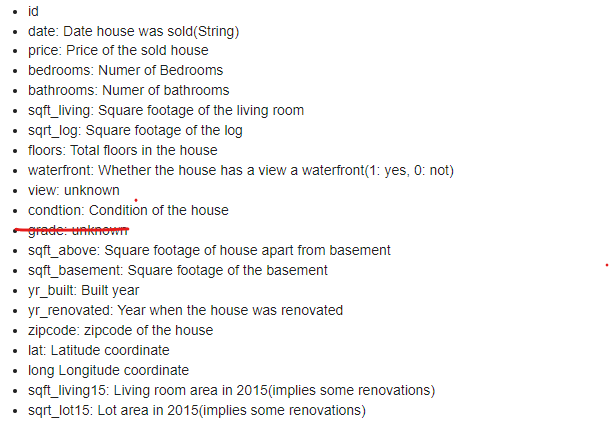

## Condition 
https://selling-guide.fanniemae.com/Underwriting-Property-Projects/Appraisal-Requirements/Appraisal-Report-Assessment/Property-Condition-Construction-Quality/1104684711/What-are-the-property-condition-ratings-used-by-the-appraiser.htm

Mejor casa 5 peor 0

## Grade

Leer https://www.yadkincountync.gov/DocumentCenter/View/776/Section-5?bidId=. 

Mejor casa 13 peor 0


## View

Mejor casa max y peor casa min




In [2]:
datos = pd.read_csv("D:/DatasetsVault/HouseSalesKingCounty/kc_house_data.csv")

# Revisión de estructura y de datos nulos.

No hay datos nulos, y hay que tener cuidado con la representación de las variable yr_built y yr_renovated para evitar ambiguedades. Estas variables no son numéricas sino categóricas ordinales. La variable ZIPCODE es una variable categórica. Para reflejar esa naturaleza se propone un **preprocesamiento**

In [3]:
datos.isna().sum()
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Eliminación de columnas

Le eliminan la column id por no presentar información relevante para el modelo. Las columnas "date", "lat", "long" se eliminan dado que no se pretende hacer un análisis de tipo serie temporal (date) ni un análisis espacial (Lat y long)

In [4]:
datos.drop(columns=["id", "date", "lat", "long"], inplace=True)

# Búsqueda de datos anómalos

- Las variable binaria: waterfront deben ser analizadas para saber si solo tienen dos valores unicos. 
- Variables ordinales: Condition, view y grade. Hay que estimar cuál es el orden de los valores. Dado que no existe la ayuda de un perito para valorar las variables se hace al ojo con gráficos de caja y bigotes

In [5]:
print(datos["waterfront"].unique())

[0 1]


<Axes: xlabel='grade', ylabel='price'>

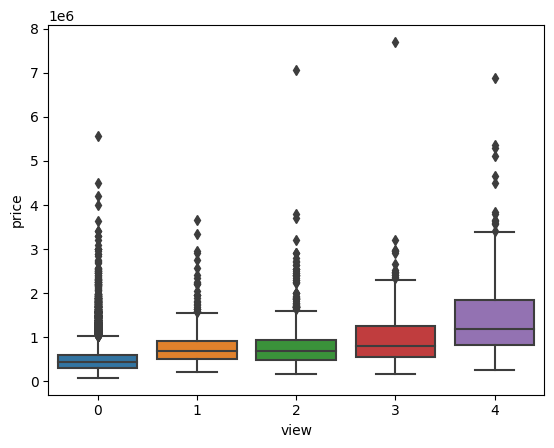

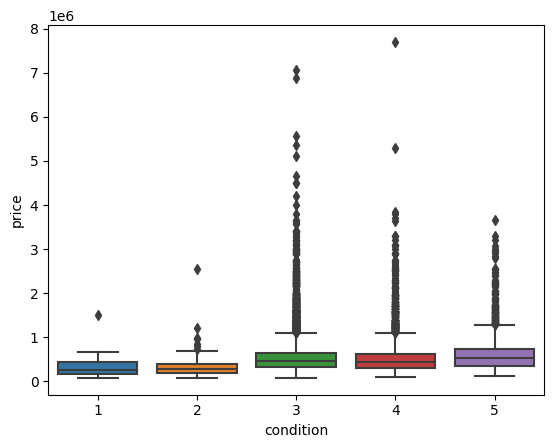

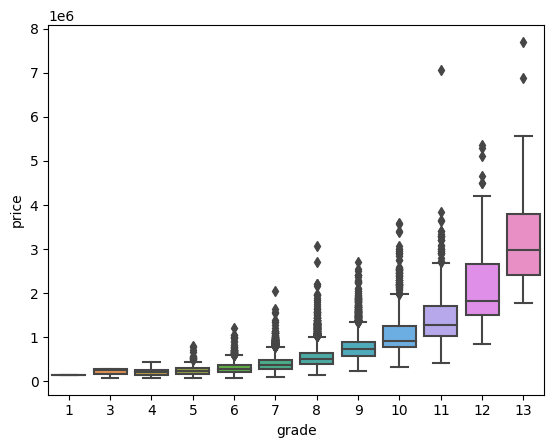

In [6]:
figura01 = plt.figure()
sns.boxplot(data=datos, x="view", y="price")
figura02 = plt.figure()
sns.boxplot(data=datos, x="condition", y="price")
figura03 = plt.figure()
sns.boxplot(data=datos, x="grade", y="price")

## Buscando relaciones

In [29]:
datos.drop(datos[datos.bedrooms==33].index, inplace=True) #Dato demasiado alejado de la dinámica de la relación
datos.drop(datos[datos.bathrooms>=7.5].index, inplace=True)
datos.drop(datos[(datos.bathrooms==4.5) & (datos.price==7.0625e6)].index, inplace=True)
datos.drop(datos[datos.sqft_living>=9200].index, inplace=True)

In [26]:
datos[(datos.bathrooms==4.5) & (datos.price==7.0625e6)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
3914,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449


In [30]:
import plotly.express as px

figura = px.scatter_matrix(data_frame=datos, 
                           dimensions=["price", "bedrooms", "bathrooms", "sqft_living" ])
figura.show()

In [43]:
datos["log_sqft_living"] = datos.sqft_living.apply(np.log10)

In [44]:
figura = px.scatter_matrix(data_frame=datos, 
                           dimensions=["price", "log_sqft_living", "chg_sqft_living", "sqft_living" ])
figura.show()